In [1]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2024-07-31 22:24:08.205220: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-31 22:24:08.254521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 22:24:09.101442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.13.1
2.13.1


In [2]:
#Make sure the GPU is available. 
import tensorflow as tf
device_name = tf.test.gpu_device_name()

2024-07-31 22:24:12.341237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-31 22:24:12.342657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-31 22:24:12.376799: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
device_name

'/device:GPU:0'

In [4]:
#Make sure the GPU is available. 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


2024-07-31 22:24:20.913522: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-31 22:24:20.916283: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-31 22:24:20.918954: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
import segmentation_models_3D as sm


Segmentation Models: using `tf.keras` framework.


In [6]:
from skimage import io
from patchify import patchify, unpatchify
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [7]:
num_epochs = 1500


vista_crop_dict = { 0:'NA' , 1: 'ALFALFA', 2: 'BEET', 3: 'CLOVER', 4: 'FLAX', 5: 'FLOWERING_LEGUMES', 6: 'FLOWERS', 7: 'FOREST', 8: 'GRAIN_MAIZE', 9: 'GRASSLAND', 10: 'HOPS', 11: 'LEGUMES', 12: 'NA', 13: 'PERMANENT_PLANTATIONS', 14: 'PLASTIC', 15: 'POTATO', 16: 'PUMPKIN', 17: 'RICE', 18: 'SILAGE_MAIZE', 19: 'SOY', 20: 'SPRING_BARLEY', 21: 'SPRING_OAT', 22: 'SPRING_OTHER_CEREALS', 23: 'SPRING_RAPESEED', 24: 'SPRING_RYE', 25: 'SPRING_SORGHUM', 26: 'SPRING_SPELT', 27: 'SPRING_TRITICALE', 28: 'SPRING_WHEAT', 29: 'SUGARBEET', 30: 'SUNFLOWER', 31: 'SWEET_POTATOES', 32: 'TEMPORARY_GRASSLAND', 33: 'WINTER_BARLEY', 34: 'WINTER_OAT', 35: 'WINTER_OTHER_CEREALS', 36: 'WINTER_RAPESEED', 37: 'WINTER_RYE', 38: 'WINTER_SORGHUM', 39: 'WINTER_SPELT', 40: 'WINTER_TRITICALE', 41: 'WINTER_WHEAT'}

In [9]:
labels = np.load('/home/luser/stelar_3dunet/storage/full_mast/vista_labes_aligned.npy').astype(np.uint8)


In [10]:
unique_elements, element_counts = np.unique(labels, return_counts=True)
unique_elements, element_counts

(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
        19, 20, 21, 23, 27, 28, 30, 32, 33, 34, 35, 36, 37, 40, 41],
       dtype=uint8),
 array([61307860,  1106626,   146323,   143701,     7143,     3025,
          205807,  4566575,  7400638,       72,   924407,   458142,
         8427517,    18792,    60594,     9681,   676780,  1376503,
           31686,     6077,     2623,     2499,     8633,  3142945,
         1564605,   791290,    87956,     1016,  1003306,    16938,
          444574,  6095670]))

In [11]:
np.where(labels==40)

(array([   4,    4,    4, ..., 9958, 9959, 9959]),
 array([5977, 5978, 5979, ..., 8201, 8198, 8199]))

In [12]:
sorted_indices = np.argsort(-element_counts)


In [13]:

# Arrange unique elements and their counts in descending order
unique_elements_sorted = unique_elements[sorted_indices]
element_counts_sorted = element_counts[sorted_indices]

In [14]:
element_counts_sorted, unique_elements_sorted

(array([61307860,  8427517,  7400638,  6095670,  4566575,  3142945,
         1564605,  1376503,  1106626,  1003306,   924407,   791290,
          676780,   458142,   444574,   205807,   146323,   143701,
           87956,    60594,    31686,    18792,    16938,     9681,
            8633,     7143,     6077,     3025,     2623,     2499,
            1016,       72]),
 array([ 0, 13,  9, 41,  8, 30, 32, 19,  1, 36, 11, 33, 18, 12, 40,  7,  2,
         3, 34, 15, 20, 14, 37, 16, 28,  4, 21,  5, 23, 27, 35, 10],
       dtype=uint8))

In [16]:
all_input_img = []
all_input_mask = []
for a in range(40):
    input_img = io.imread('/home/luser/stelar_3dunet/storage/data_labels/train'+str(a)+'.tif')
    input_mask = io.imread('/home/luser/stelar_3dunet/storage/data_labels/lab'+str(a)+'.tif').astype(np.uint8)
    all_input_img.append(input_img)
    all_input_mask.append(input_mask)

input_img = np.array(all_input_img).reshape(-1, 64, 64, 64)
input_mask = np.array(all_input_mask).reshape(-1, 64, 64)
input_mask = np.repeat(input_mask[:, np.newaxis, :, :], repeats=64, axis=1)

print(input_img.shape)
print(input_mask.shape)

(2560, 64, 64, 64)
(2560, 64, 64, 64)


In [17]:
unique_elements, element_counts = np.unique(input_mask, return_counts=True)
unique_elements

array([ 0,  1,  7,  8,  9, 11, 13, 32], dtype=uint8)

In [18]:
#clear memory
all_input_img = 0
all_input_mask = 0

In [19]:
lai_uniques = np.unique(input_img)

for n in range(len(lai_uniques)):
  input_img[input_img==lai_uniques[n]]=n
input_img = input_img.astype(np.uint8)

In [20]:
lai_uniques

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975, 1.   , 1.025, 1.05 , 1.075, 1.1  ,
       1.125, 1.15 , 1.175, 1.2  , 1.225, 1.25 , 1.275, 1.3  , 1.325,
       1.35 , 1.375, 1.4  , 1.425, 1.45 , 1.475, 1.5  , 1.525, 1.55 ,
       1.575, 1.6  , 1.625, 1.65 , 1.675, 1.7  , 1.725, 1.75 ])

In [21]:
len(lai_uniques)

71

In [18]:
# clear memory 
lai_uniques = 0

In [19]:
n_classes=4

In [20]:
input_mask_1 = input_mask.copy()
input_mask_2 = input_mask.copy()
input_mask_3 = input_mask.copy()


input_mask_1[input_mask_1==0]=0
input_mask_1[input_mask_1==1]=0
input_mask_1[input_mask_1==7]=0
input_mask_1[input_mask_1==8]=0
input_mask_1[input_mask_1==9]=0
input_mask_1[input_mask_1==11]=1
input_mask_1[input_mask_1==13]=2
input_mask_1[input_mask_1==32]=3

train_img = np.stack((input_img,)*3, axis=-1)
train_mask = np.expand_dims(input_mask_1, axis=4)
train_mask_cat = to_categorical(train_mask, num_classes=n_classes)
X_train, X_test, y_train, y_test_1 = train_test_split(train_img, train_mask_cat, test_size = 0.10, random_state = 0)


input_mask_2[input_mask_2==0]=0
input_mask_2[input_mask_2==1]=0
input_mask_2[input_mask_2==7]=0
input_mask_2[input_mask_2==8]=0
input_mask_2[input_mask_2==9]=1
input_mask_2[input_mask_2==11]=2
input_mask_2[input_mask_2==13]=3
input_mask_2[input_mask_2==32]=0

train_img = np.stack((input_img,)*3, axis=-1)
train_mask = np.expand_dims(input_mask_2, axis=4)
train_mask_cat = to_categorical(train_mask, num_classes=n_classes)
X_train, X_test, y_train, y_test_2 = train_test_split(train_img, train_mask_cat, test_size = 0.10, random_state = 0)


input_mask_3[input_mask_3==0]=0
input_mask_3[input_mask_3==1]=0
input_mask_3[input_mask_3==7]=0
input_mask_3[input_mask_3==8]=0
input_mask_3[input_mask_3==9]=1
input_mask_3[input_mask_3==11]=2
input_mask_3[input_mask_3==13]=3
input_mask_3[input_mask_3==32]=0

train_img = np.stack((input_img,)*3, axis=-1)
train_mask = np.expand_dims(input_mask_3, axis=4)
train_mask_cat = to_categorical(train_mask, num_classes=n_classes)
X_train, X_test, y_train, y_test_3 = train_test_split(train_img, train_mask_cat, test_size = 0.10, random_state = 0)




In [21]:
'''train_img = np.stack((input_img,)*3, axis=-1)
train_mask = np.expand_dims(input_mask, axis=4)
train_mask_cat = to_categorical(train_mask, num_classes=n_classes)
X_train, X_test, y_train, y_test = train_test_split(train_img, train_mask_cat, test_size = 0.10, random_state = 0)'''

'train_img = np.stack((input_img,)*3, axis=-1)\ntrain_mask = np.expand_dims(input_mask, axis=4)\ntrain_mask_cat = to_categorical(train_mask, num_classes=n_classes)\nX_train, X_test, y_train, y_test = train_test_split(train_img, train_mask_cat, test_size = 0.10, random_state = 0)'

In [22]:
# emptying space 
train_img = 0
train_mask_cat = 0
train_mask = 0
input_mask_1 = 0
input_mask_2 = 0
input_mask_3 = 0
input_img = 0

X_train = 0
y_train = 0

In [23]:
X_test.shape, y_test_1.shape, y_test_3.shape

((256, 64, 64, 64, 3), (256, 64, 64, 64, 4), (256, 64, 64, 64, 4))

Backbones: ['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152', 'seresnet18', 'seresnet34', 'seresnet50', 'seresnet101', 'seresnet152', 'seresnext50', 'seresnext101', 'senet154', 'resnext50', 'resnext101', 'vgg16', 'vgg19', 'densenet121', 'densenet169', 'densenet201', 'inceptionresnetv2', 'inceptionv3', 'mobilenet', 'mobilenetv2', 'efficientnetb0', 'efficientnetb1', 'efficientnetb2', 'efficientnetb3', 'efficientnetb4', 'efficientnetb5', 'efficientnetb6', 'efficientnetb7']

In [24]:
BACKBONE = 'vgg16'  #Try vgg16, efficientnetb7, inceptionv3, resnet50

In [25]:
preprocess_input = sm.get_preprocessing(BACKBONE)

In [26]:
#Preprocess input data - otherwise you end up with garbage resutls 
# and potentially model that does not converge.
#X_train_prep = preprocess_input(X_train)
#X_test_prep = preprocess_input(X_test)

In [27]:

from keras.models import load_model

my_model_1 = load_model('/home/luser/stelar_3d/storage/saved_model/3D_unet_labels_'+vista_crop_dict[0]+'_'+vista_crop_dict[11]+'_'+vista_crop_dict[13]+'_'+vista_crop_dict[32]+'_num_epocs_'+str(num_epochs)+'.h5', compile=False)
my_model_2 = load_model('/home/luser/stelar_3d/storage/saved_model/3D_unet_labels_'+vista_crop_dict[0]+'_'+vista_crop_dict[9]+'_'+vista_crop_dict[11]+'_'+vista_crop_dict[13]+'_num_epocs_'+str(num_epochs)+'.h5', compile=False)
my_model_3 = load_model('/home/luser/stelar_3d/storage/saved_model/3D_unet_labels_'+vista_crop_dict[0]+'_'+vista_crop_dict[1]+'_'+vista_crop_dict[7]+'_'+vista_crop_dict[8]+'_num_epocs_'+str(num_epochs)+'.h5', compile=False)



2024-06-24 15:21:40.279340: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-24 15:21:40.282046: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-24 15:21:40.284613: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

In [20]:
#Predict on the test data
'''X_test = X_train[:10]
y_test = y_train[:10]'''
y_pred=my_model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=4)
y_test_argmax = np.argmax(y_test, axis=4)


2024-04-11 00:55:20.655031: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907


8/8 [==============================] - 8s 113ms/step


In [21]:
print(y_pred_argmax.shape)
print(y_test_argmax.shape)
print(np.unique(y_pred_argmax))

(256, 64, 64, 64)
(256, 64, 64, 64)
[0 1 2 3]


In [28]:
def get_labels_in_color(groud_truth_image):
    color_map = {
        0: [0, 0, 0],1: [0, 255, 0], 2: [0, 0, 255], 3: [255, 255, 0], 4: [255, 165, 0], 5: [255, 0, 255], 6: [0, 255, 255],   
        7: [128, 0, 128], 8: [128, 128, 0], 9: [0, 128, 0], 10: [128, 0, 0], 11: [0, 0, 128], 12: [128, 128, 128], 13: [0, 128, 128],   
        14: [255, 0, 0], 15: [255, 255, 255], 16: [192, 192, 192], 17: [255, 0, 0], 18: [0, 255, 0], 19: [0, 0, 255], 20: [255, 255, 0],   
        21: [255, 165, 0], 22: [255, 0, 255],  23: [0, 255, 255],  24: [128, 0, 128],  25: [128, 128, 0],  26: [0, 128, 0],     
        27: [128, 0, 0],  28: [0, 0, 128], 29: [128, 128, 128], 30: [0, 128, 128], 31: [0, 0, 0], 32: [255, 255, 255], 
        33: [192, 192, 192], 34: [255, 0, 0], 35: [0, 255, 0], 36: [0, 0, 255], 37: [255, 255, 0], 38: [255, 165, 0], 
        39: [255, 0, 255],  40: [0, 128, 255] }
    groud_truth_color_image = np.zeros(groud_truth_image.shape + (3,), dtype=np.uint8)
    for i in range(groud_truth_image.shape[0]):
        for j in range(groud_truth_image.shape[1]):
            segment_id_gt = groud_truth_image[i, j]
            groud_truth_color_image[i, j] = color_map[segment_id_gt]
    return groud_truth_color_image

In [29]:

# give a number between 0 and 256: len(X_test) as input to the function
def plot_results(test_img_number):
    test_img = X_test[test_img_number-1]

    ground_truth_1 = y_test_1[test_img_number-1]
    ground_truth_2 = y_test_2[test_img_number-1]
    ground_truth_3 = y_test_3[test_img_number-1]


    ground_truth_argmax_1 = np.argmax(ground_truth_1, axis=3)
    ground_truth_argmax_2 = np.argmax(ground_truth_2, axis=3)
    ground_truth_argmax_3 = np.argmax(ground_truth_3, axis=3)

    test_img_input=np.expand_dims(test_img, 0)
    test_img_input1 = preprocess_input(test_img_input)

    test_pred1 = my_model_1.predict(test_img_input1)
    test_pred2 = my_model_2.predict(test_img_input1)
    test_pred3 = my_model_3.predict(test_img_input1)

    test_prediction1 = np.argmax(test_pred1, axis=4)[0,:,:,:]
    test_prediction2 = np.argmax(test_pred2, axis=4)[0,:,:,:]
    test_prediction3 = np.argmax(test_pred2, axis=4)[0,:,:,:]

    test_prediction1[test_prediction1==0]=0
    test_prediction1[test_prediction1==1]=11
    test_prediction1[test_prediction1==2]=13
    test_prediction1[test_prediction1==3]=32

    test_prediction2[test_prediction2==0]=0
    test_prediction2[test_prediction2==1]=9
    test_prediction2[test_prediction2==2]=11
    test_prediction2[test_prediction2==3]=13

    ground_truth_argmax_1[ground_truth_argmax_1==0]=0
    ground_truth_argmax_1[ground_truth_argmax_1==1]=11
    ground_truth_argmax_1[ground_truth_argmax_1==2]=13
    ground_truth_argmax_1[ground_truth_argmax_1==3]=32

    ground_truth_argmax_2[ground_truth_argmax_2==0]=0
    ground_truth_argmax_2[ground_truth_argmax_2==1]=9
    ground_truth_argmax_2[ground_truth_argmax_2==2]=11
    ground_truth_argmax_2[ground_truth_argmax_2==3]=13
 
    concatenated_preds = np.concatenate((test_prediction1, test_prediction2), axis=0)
    concatenated_labels = np.concatenate((ground_truth_argmax_1, ground_truth_argmax_2), axis=0)
    result_image = np.median(concatenated_preds, axis=0).astype(np.uint8)
    ground_truth_image = np.median(concatenated_labels, axis=0).astype(np.uint8)
    result_image = get_labels_in_color(result_image)
    ground_truth = get_labels_in_color(ground_truth_image)


    plt.figure(figsize=(10,10))
    plt.title(' Time series LAI input')
    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.imshow(test_img[i,:,:, 1])
        plt.axis('off')
    plt.figure(figsize=(12, 8))
    plt.subplot(232)
    plt.title(' Ground truth')
    plt.imshow(ground_truth)
    plt.subplot(233)
    plt.title('Prediction')
    plt.imshow(result_image)
    plt.show()


In [30]:

# give a number between 0 and 256: len(X_test) as input to the function
def plot_results(test_img_number):
    color_map = {
        0: [0, 0, 0],1: [0, 255, 0], 2: [0, 0, 255], 3: [255, 255, 0], 4: [255, 165, 0], 5: [255, 0, 255], 6: [0, 255, 255],   
        7: [128, 0, 128], 8: [128, 128, 0], 9: [0, 128, 0], 10: [128, 0, 0], 11: [0, 0, 128], 12: [128, 128, 128], 13: [0, 128, 128],   
        14: [255, 0, 0], 15: [255, 255, 255], 16: [192, 192, 192], 17: [255, 0, 0], 18: [0, 255, 0], 19: [0, 0, 255], 20: [255, 255, 0],   
        21: [255, 165, 0], 22: [255, 0, 255],  23: [0, 255, 255],  24: [128, 0, 128],  25: [128, 128, 0],  26: [0, 128, 0],     
        27: [128, 0, 0],  28: [0, 0, 128], 29: [128, 128, 128], 30: [0, 128, 128], 31: [0, 0, 0], 32: [255, 255, 255], 
        33: [192, 192, 192], 34: [255, 0, 0], 35: [0, 255, 0], 36: [0, 0, 255], 37: [255, 255, 0], 38: [255, 165, 0], 
        39: [255, 0, 255],  40: [0, 128, 255] }
    test_img = X_test[test_img_number-1]

    ground_truth_1 = y_test_1[test_img_number-1]
    ground_truth_2 = y_test_2[test_img_number-1]
    ground_truth_3 = y_test_3[test_img_number-1]


    ground_truth_argmax_1 = np.argmax(ground_truth_1, axis=3)
    ground_truth_argmax_2 = np.argmax(ground_truth_2, axis=3)
    ground_truth_argmax_3 = np.argmax(ground_truth_3, axis=3)


    test_img_input=np.expand_dims(test_img, 0)
    test_img_input1 = preprocess_input(test_img_input)

    test_pred1 = my_model_1.predict(test_img_input1)
    test_pred2 = my_model_2.predict(test_img_input1)
    test_pred3 = my_model_3.predict(test_img_input1)

    
    test_prediction1 = np.argmax(test_pred1, axis=4)[0,:,:,:]
    test_prediction2 = np.argmax(test_pred2, axis=4)[0,:,:,:]
    test_prediction3 = np.argmax(test_pred3, axis=4)[0,:,:,:]


    test_prediction1[test_prediction1==0]=0
    test_prediction1[test_prediction1==1]=11
    test_prediction1[test_prediction1==2]=13
    test_prediction1[test_prediction1==3]=32

    test_prediction2[test_prediction2==0]=0
    test_prediction2[test_prediction2==1]=9
    test_prediction2[test_prediction2==2]=11
    test_prediction2[test_prediction2==3]=13

    test_prediction3[test_prediction3==0]=0
    test_prediction3[test_prediction3==1]=1
    test_prediction3[test_prediction3==2]=7
    test_prediction3[test_prediction3==3]=8

    ground_truth_argmax_1[ground_truth_argmax_1==0]=0
    ground_truth_argmax_1[ground_truth_argmax_1==1]=11
    ground_truth_argmax_1[ground_truth_argmax_1==2]=13
    ground_truth_argmax_1[ground_truth_argmax_1==3]=32

    ground_truth_argmax_2[ground_truth_argmax_2==0]=0
    ground_truth_argmax_2[ground_truth_argmax_2==1]=9
    ground_truth_argmax_2[ground_truth_argmax_2==2]=11
    ground_truth_argmax_2[ground_truth_argmax_2==3]=13

    ground_truth_argmax_3[ground_truth_argmax_3==0]=0
    ground_truth_argmax_3[ground_truth_argmax_3==1]=1
    ground_truth_argmax_3[ground_truth_argmax_3==2]=7
    ground_truth_argmax_3[ground_truth_argmax_3==3]=8
 
    '''concatenated_preds = np.concatenate((test_prediction1, test_prediction2, test_prediction3), axis=0)
    concatenated_labels = np.concatenate((ground_truth_argmax_1, ground_truth_argmax_2, ground_truth_argmax_3), axis=0)'''

    concatenated_preds = np.concatenate((test_prediction1, test_prediction2, test_prediction3), axis=0)
    concatenated_labels = np.concatenate((ground_truth_argmax_1, ground_truth_argmax_2, ground_truth_argmax_3), axis=0)

    result_image = np.median(concatenated_preds, axis=0).astype(np.uint8)
    ground_truth_image = np.median(concatenated_labels, axis=0).astype(np.uint8)

    #print(np.unique(result_image))

    all_crop_vals = np.concatenate((ground_truth_image, result_image))
    uniq_crop_vals = np.unique(all_crop_vals)
    #print("uniq_crop_vals", uniq_crop_vals)

    result_image = get_labels_in_color(result_image)
    ground_truth = get_labels_in_color(ground_truth_image)


    plt.figure(figsize=(10,10))
    plt.title(' Time series LAI input')
    for i in range(64):
        plt.axis('off')
        plt.subplot(8, 8, i+1)
        plt.imshow(test_img[i,:,:, 1])
        plt.axis('off')
    plt.figure(figsize=(12, 8))
    plt.subplot(232)
    plt.title(' Ground truth')
    plt.imshow(ground_truth)


    legend_elements = []

    for k in uniq_crop_vals:
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=[value / 255 for value in color_map[k]] , markersize=10, label=vista_crop_dict[k]))


    plt.subplot(233)
    plt.title('Prediction')
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.imshow(result_image)
    plt.show()


1/1 [==============================] - 1s 656ms/step


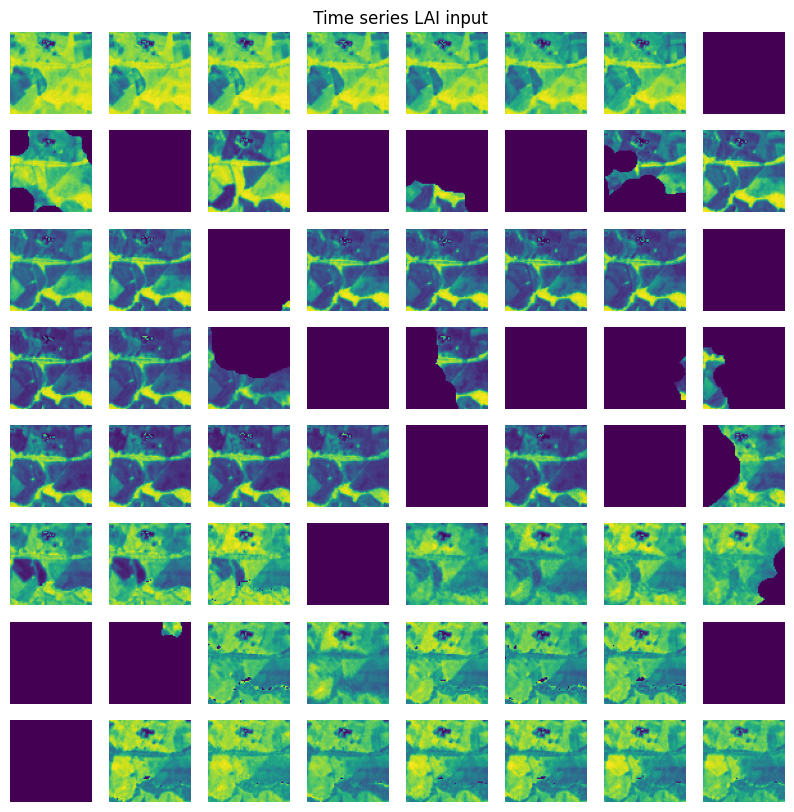

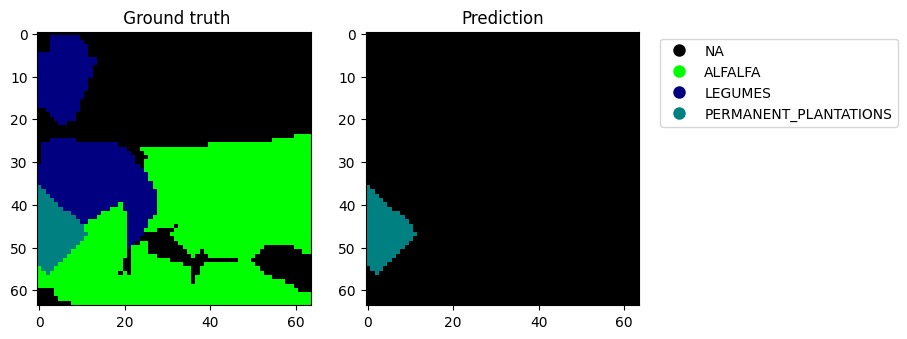

In [31]:
plot_results(34)

1/1 [==============================] - 0s 262ms/step


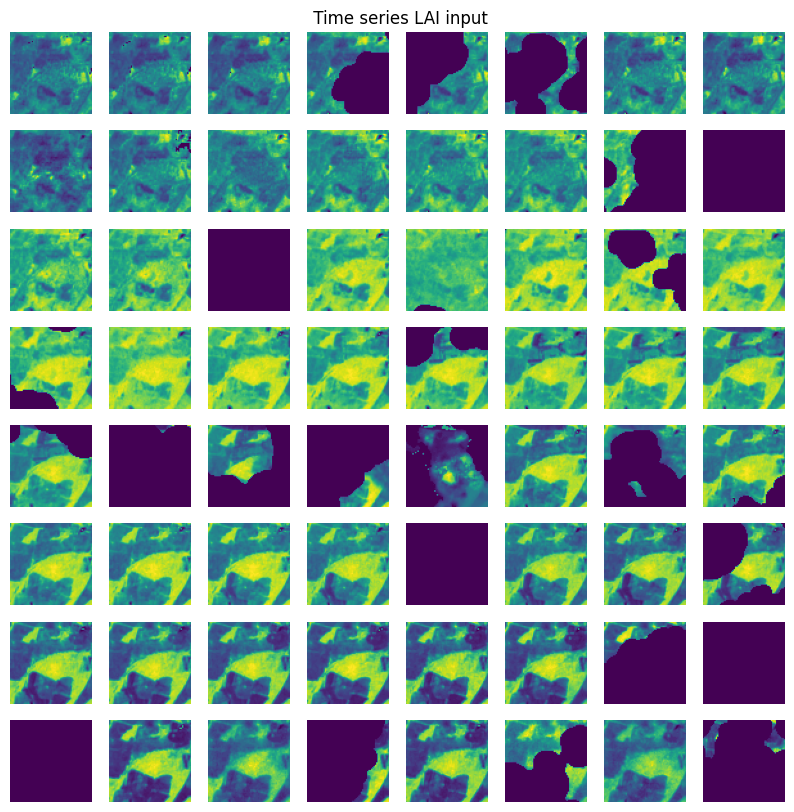

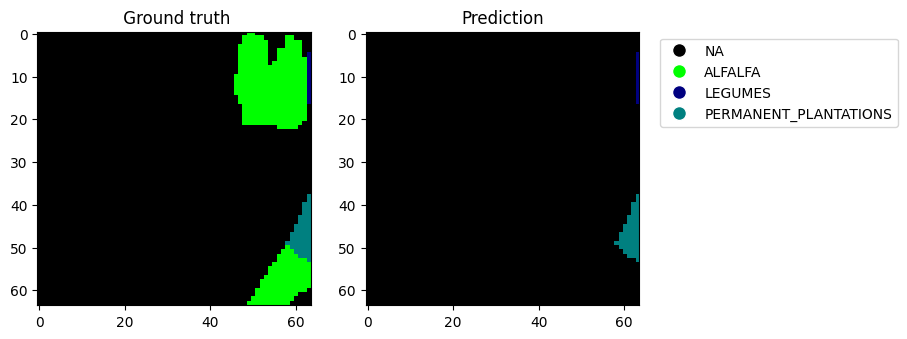

In [32]:
plot_results(1)

1/1 [==============================] - 0s 277ms/step


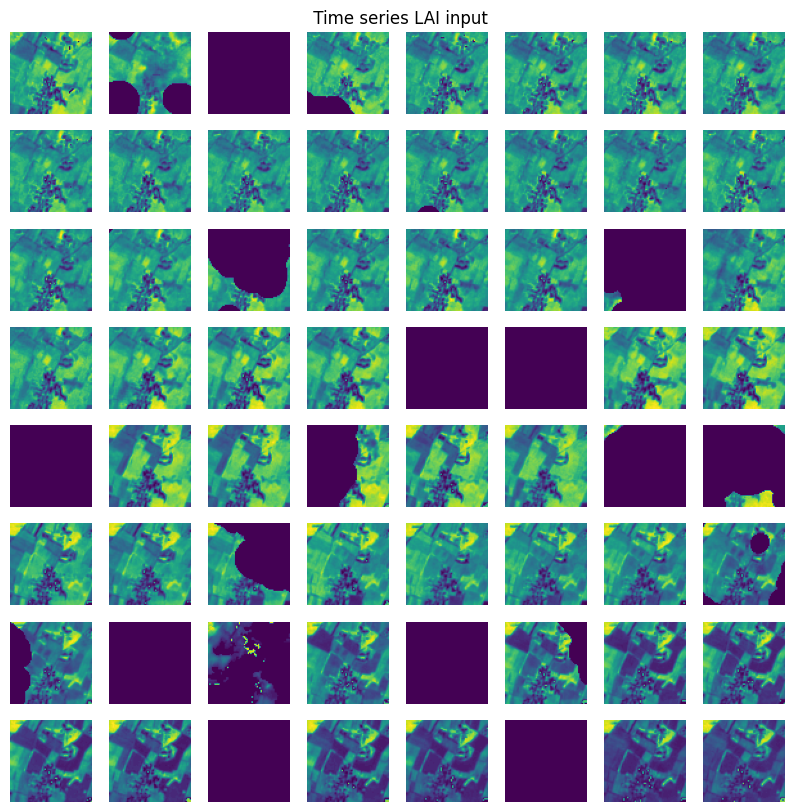

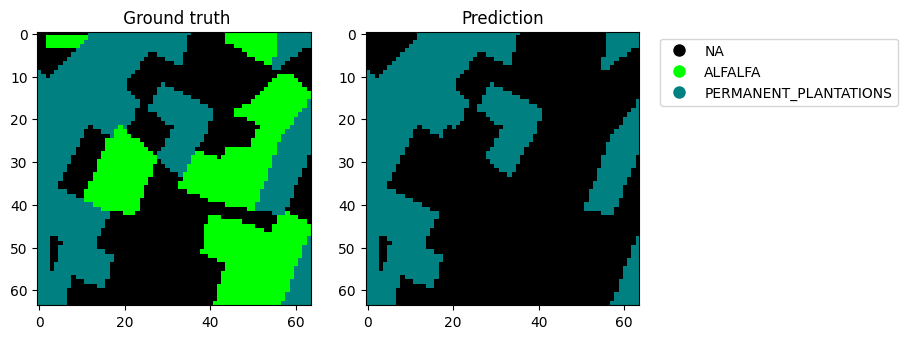

In [33]:
plot_results(3)

1/1 [==============================] - 0s 39ms/step


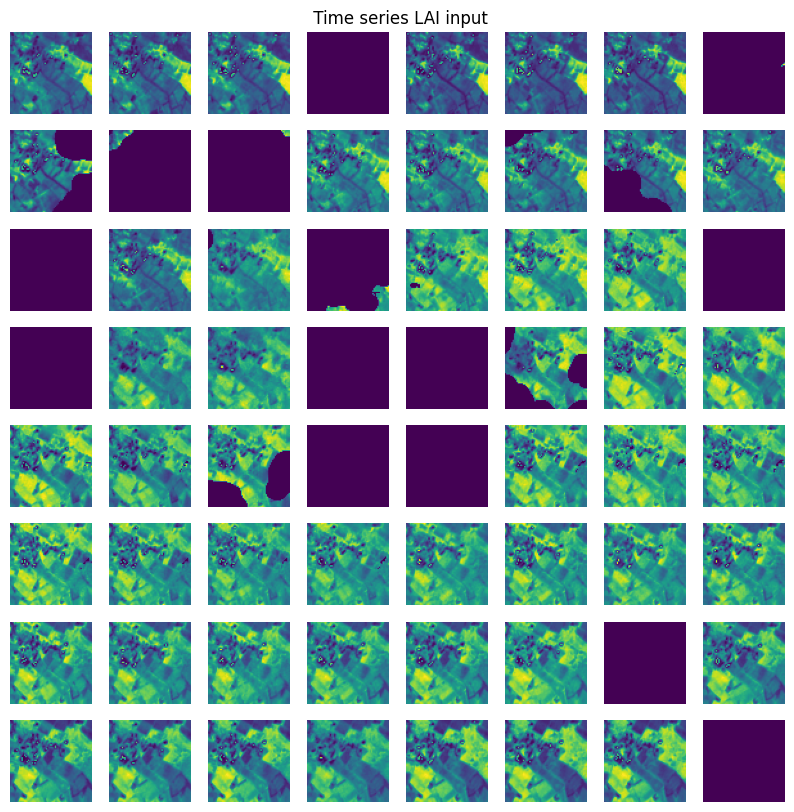

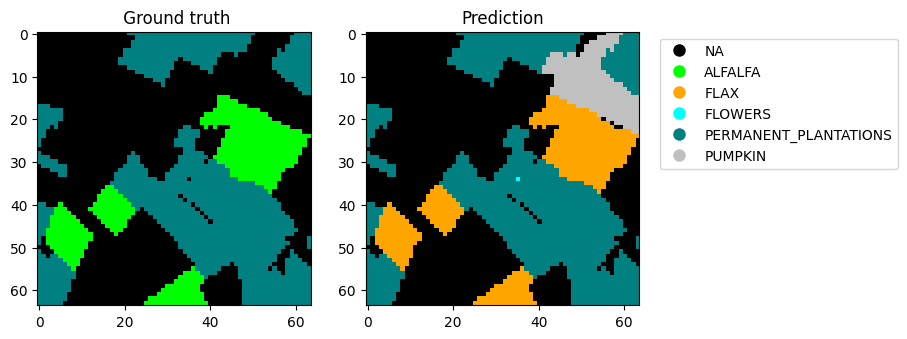

In [56]:
plot_results(35)